# Instructions

We can skip the next cell if neural_de was installed from pip install.

In [1]:
import sys
# sys.path.append("..")
import time

Let's import from neural_de the brightness method

In [2]:
from neural_de.transformations import BrightnessEnhancer
import tensorflow as tf

2025-03-07 10:44:27.599713: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-07 10:44:27.614619: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741344267.631822    9550 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741344267.637261    9550 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 10:44:27.654684: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

We load an example image

Num GPUs Available:  2


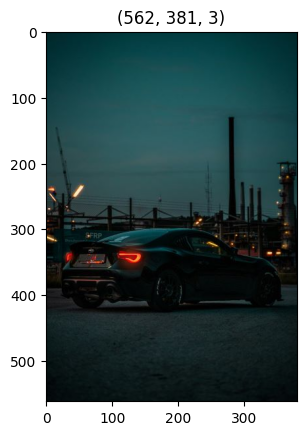

In [3]:
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
import os
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
start=time.time()
input_path = Path('../examples/images/test_brightness_car.jpg')
image = cv2.imread(str(input_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title(image.shape)
plt.imshow(image)

# Enhancing an image

We create an instance of BrightnessEnhancer :

In [4]:

image_enhancer = BrightnessEnhancer()

[03-07 10:44:34] {/home/jovyan/Maturation/env-neuralDE-NG/lib/python3.12/site-packages/neural_de/utils/_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]


We apply the transform method to any number of images. 
For example, one image and then two images in a batch.

In [5]:
enhanced_images = image_enhancer.transform([image])


[03-07 10:44:34] {/home/jovyan/Maturation/env-neuralDE-NG/lib/python3.12/site-packages/neural_de/transformations/_brightness_enhancer.py:56} INFO - Image normalized as between [0;1]


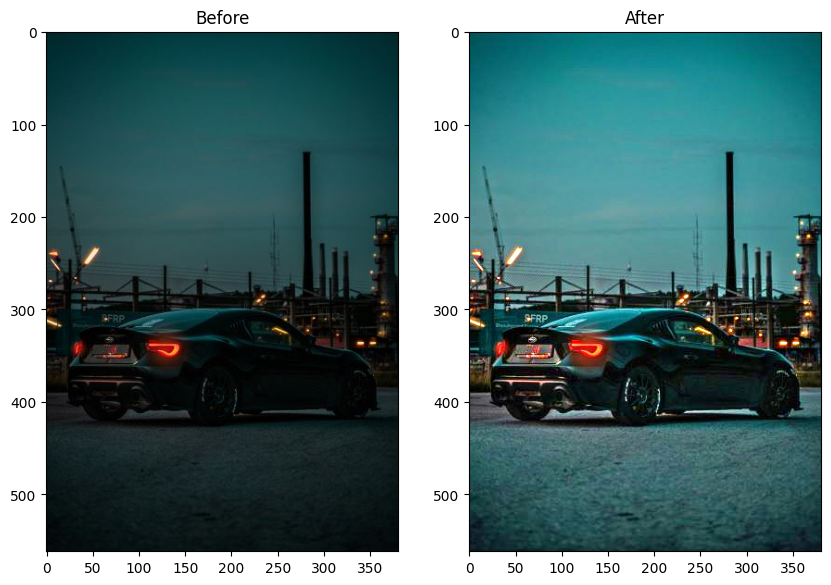

In [6]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Before")
plt.imshow(image)
plt.subplot(1,2,2)
plt.title("After")
plt.imshow(enhanced_images[0])
plt.show()

Now an example with two images in a batch.

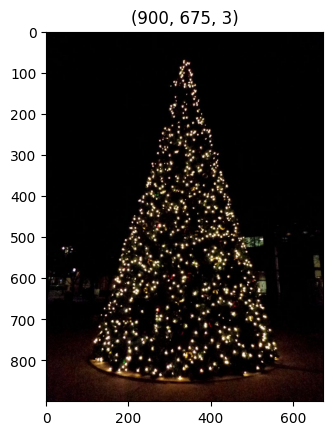

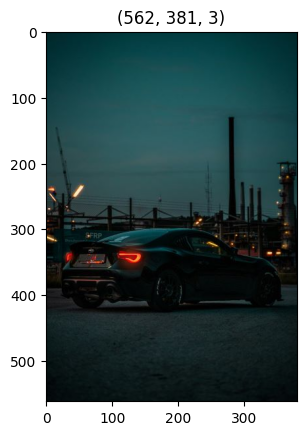

In [7]:
ROOT_DIR = "../examples/images"
image_path_list = []
image_path_list.append(ROOT_DIR +  "/test_brightness_xmass_tree.jpg")
image_path_list.append(ROOT_DIR +  "/test_brightness_car.jpg")
image_list = []
for image_path_str in image_path_list:        
    input_path = Path(image_path_str)
    image = cv2.imread(str(input_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_list.append(image)
    plt.figure()
    plt.title(image.shape)
    plt.imshow(image)

In [8]:
enhanced_images = image_enhancer.transform(image_list)

[03-07 10:44:36] {/home/jovyan/Maturation/env-neuralDE-NG/lib/python3.12/site-packages/neural_de/transformations/_brightness_enhancer.py:56} INFO - Image normalized as between [0;1]
[03-07 10:44:37] {/home/jovyan/Maturation/env-neuralDE-NG/lib/python3.12/site-packages/neural_de/transformations/_brightness_enhancer.py:56} INFO - Image normalized as between [0;1]


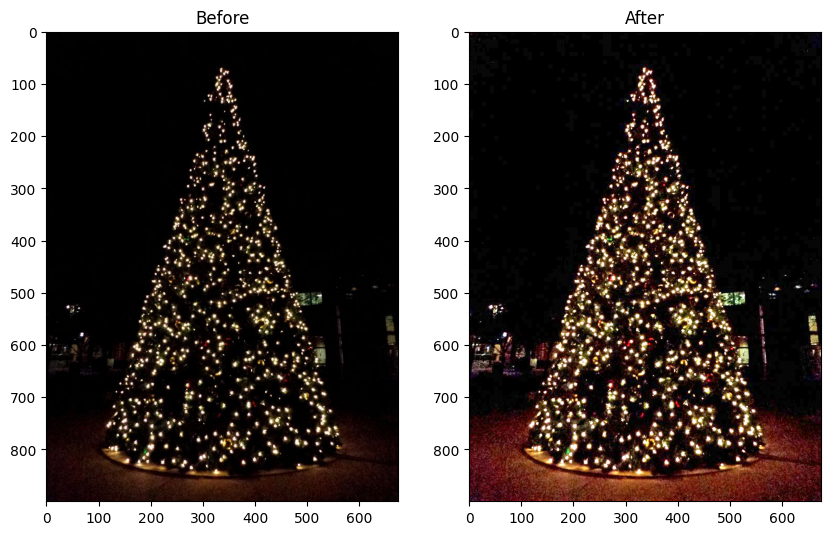

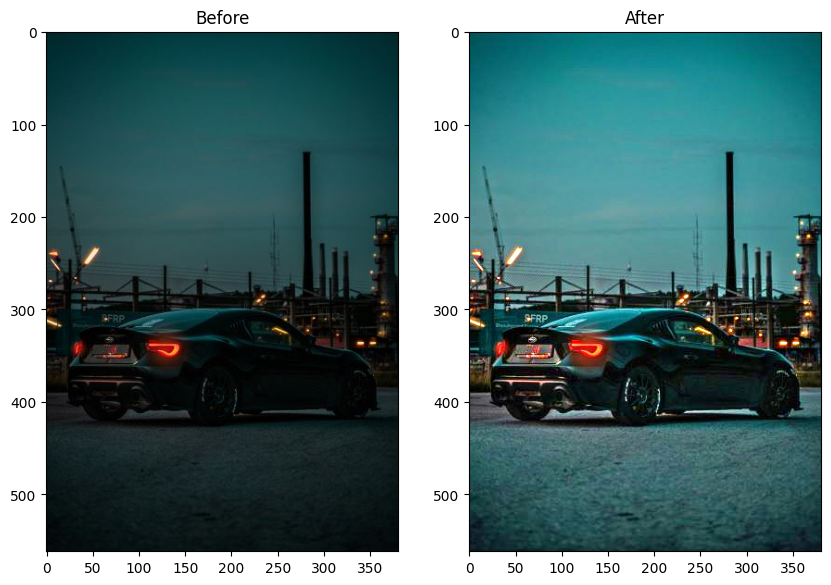

In [9]:
for image_index_ in range(len(image_list)):
    plt.figure(figsize=(10,7))
    plt.subplot(1,2,1)
    plt.title("Before")
    plt.imshow(image_list[image_index_])
    plt.subplot(1,2,2)
    plt.title("After")
    plt.imshow(enhanced_images[image_index_])
    plt.show()

In [10]:
end=time.time()
print("final duration : ",end-start)

final duration :  5.869063854217529
